In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

# parameters
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

# warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
stores=pd.read_csv("C:\\Users\\tavleen kaur\\Desktop\\0b. Assignments & Case Studies\\New folder (2)\\Walmart Store Sales Forecasting\\stores.csv")
train=pd.read_csv("C:\\Users\\tavleen kaur\\Desktop\\0b. Assignments & Case Studies\\New folder (2)\\Walmart Store Sales Forecasting\\train.csv")
t=pd.read_csv("C:\\Users\\tavleen kaur\\Desktop\\0b. Assignments & Case Studies\\New folder (2)\\Walmart Store Sales Forecasting\\test.csv")
features=pd.read_csv("C:\\Users\\tavleen kaur\\Desktop\\0b. Assignments & Case Studies\\New folder (2)\\Walmart Store Sales Forecasting\\features.csv")

## DATA AUDIT

In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
stores.shape

(45, 3)

In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train.shape

(421570, 5)

In [8]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
features.shape

(8190, 12)

In [10]:
df=pd.merge(train,stores)
merge1=pd.merge(df,features)

In [11]:
merge1.shape

(421570, 16)

In [12]:
merge1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [13]:
merge1.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [14]:
merge1.info(null_counts = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Store         int64  
 1   Dept          int64  
 2   Date          object 
 3   Weekly_Sales  float64
 4   IsHoliday     bool   
 5   Type          object 
 6   Size          int64  
 7   Temperature   float64
 8   Fuel_Price    float64
 9   MarkDown1     float64
 10  MarkDown2     float64
 11  MarkDown3     float64
 12  MarkDown4     float64
 13  MarkDown5     float64
 14  CPI           float64
 15  Unemployment  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [15]:
merge1.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [16]:
merge1['Date']=pd.to_datetime(merge1['Date'])
merge1.Date.dtype

dtype('<M8[ns]')

In [17]:
merge1['IsHoliday']= np.where((merge1['IsHoliday']== True), 1, merge1['IsHoliday'])
merge1['IsHoliday']=np.where((merge1['IsHoliday']== False), 0, merge1['IsHoliday'])

In [18]:
merge1['IsHoliday'].dtype

dtype('int32')

In [19]:
merge1.info(null_counts = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Store         int64         
 1   Dept          int64         
 2   Date          datetime64[ns]
 3   Weekly_Sales  float64       
 4   IsHoliday     int32         
 5   Type          object        
 6   Size          int64         
 7   Temperature   float64       
 8   Fuel_Price    float64       
 9   MarkDown1     float64       
 10  MarkDown2     float64       
 11  MarkDown3     float64       
 12  MarkDown4     float64       
 13  MarkDown5     float64       
 14  CPI           float64       
 15  Unemployment  float64       
dtypes: datetime64[ns](1), float64(10), int32(1), int64(3), object(1)
memory usage: 53.1+ MB


In [20]:
conti=merge1.loc[:,((merge1.dtypes=='int64')|(merge1.dtypes=='int32')| (merge1.dtypes=='float64')|(merge1.dtypes=='float32'))]
cat=merge1.loc[:, (merge1.dtypes=='object')]
date=merge1.loc[:,(merge1.dtypes=='datetime64[ns]')]

conti.shape

(421570, 14)

In [21]:
cat.shape

(421570, 1)

In [22]:
date.shape

(421570, 1)

In [24]:
5
def continous_var_summary(x):
    return pd.Series([x.count(),x.isna().sum(),x.mean(),x.median(),x.quantile(0.01),x.quantile(0.05),x.quantile(0.1),
                      x.quantile(0.5),x.quantile(0.75),x.quantile(0.90),x.quantile(0.95),x.quantile(0.99)],
                     
                      index=['COUNT','N','MEAN','MEDIAN','P1','P5','P10','P50','P75','P90','P95','P99'])

conti.apply(continous_var_summary).T.round(2)

,COUNT,N,MEAN,MEDIAN,P1,P5,P10,P50,P75,P90,P95,P99
Store,421570.0,0.0,22.20,22.00,1.00,3.00,5.00,22.00,33.00,40.00,43.00,45.00
Dept,421570.0,0.0,44.26,37.00,1.00,4.00,7.00,37.00,74.00,92.00,95.00,98.00
Weekly_Sales,421570.0,0.0,15981.26,7612.03,5.00,59.97,291.10,7612.03,20205.85,42845.67,61201.95,106479.59
IsHoliday,421570.0,0.0,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
Size,421570.0,0.0,136727.92,140167.00,34875.00,39690.00,39910.00,140167.00,202505.00,204184.00,206302.00,219622.00
Temperature,421570.0,0.0,60.09,62.09,18.30,27.31,33.98,62.09,74.28,83.58,87.27,92.81
Fuel_Price,421570.0,0.0,3.36,3.45,2.56,2.65,2.72,3.45,3.74,3.92,4.03,4.20
MarkDown1,150681.0,270889.0,7246.42,5347.45,17.76,149.19,375.20,5347.45,9210.90,15282.47,21801.35,41524.03
MarkDown2,111248.0,310322.0,3334.63,192.00,-0.99,1.95,6.98,192.00,1926.94,8549.74,16497.47,50366.60
MarkDown3,137091.0,284479.0,1439.42,24.60,0.06,0.65,1.65,24.60,103.99,400.09,1059.90,63143.29


In [25]:
## Outlier Treatment
conti=conti.apply(lambda x: x.clip(lower= x.dropna().quantile(0.01), upper=x.quantile(0.99)))

In [26]:
conti.apply(continous_var_summary).T.round()
conti

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,24924.50,0,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,50605.27,0,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,13740.12,0,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,39954.04,0,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,32229.38,0,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,5203.31,0,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,56017.47,0,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,6817.48,0,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [27]:
## Missing Imputation in Markdowns
## Replacing NA in markdowns with zero.

conti=conti.apply(lambda x: x.fillna(0))
conti.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [28]:
## Handdling Date features
## Extracting day,montha nd year from Date
date['Day']=pd.DatetimeIndex(date['Date']).day
date['Month']=pd.DatetimeIndex(date['Date']).month
date['Year']=pd.DatetimeIndex(date['Date']).year

In [29]:
date.head()

,Date,Day,Month,Year
0,2010-02-05,5,2,2010
1,2010-02-05,5,2,2010
2,2010-02-05,5,2,2010
3,2010-02-05,5,2,2010
4,2010-02-05,5,2,2010


In [30]:
date.shape

(421570, 4)

## Creating new variable

In [31]:
from datetime import datetime
n=np.where
d=date['Date']

date['Super_Bowl']=n((d==datetime(2010,2,12))|(d==datetime(2011,2,11))|(d==datetime(2012,2,10))|(d==datetime(2013,2,8)),1,0)
date['Labor_Day']=n((d==datetime(2010,9,10))|(d==datetime(2011,9,9))|(d==datetime(2012,9,7))|(d==datetime(2013,9,6)),1,0)
date['Thanksgiving']=n((d==datetime(2010,11,26))|(d==datetime(2011,11,25))|(d==datetime(2012,11,23))|(d==datetime(2013,11,29)),1,0)
date['Christmas']=n((d==datetime(2010,12,31))|(d==datetime(2011,12,30))|(d==datetime(2012,12,28))|(d==datetime(2013,12,27)),1,0)

In [32]:
date.head()

,Date,Day,Month,Year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,2010-02-05,5,2,2010,0,0,0,0
1,2010-02-05,5,2,2010,0,0,0,0
2,2010-02-05,5,2,2010,0,0,0,0
3,2010-02-05,5,2,2010,0,0,0,0
4,2010-02-05,5,2,2010,0,0,0,0


In [34]:
date.shape

(421570, 8)

In [33]:
date.columns

Index(['Date', 'Day', 'Month', 'Year', 'Super_Bowl', 'Labor_Day',
       'Thanksgiving', 'Christmas'],
      dtype='object')

In [35]:
cat.shape

(421570, 1)

In [36]:
cat.columns

Index(['Type'], dtype='object')

In [37]:
conti.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

## Dummy Variables

In [38]:
set_1=conti[['Store','Dept']]
set_2=date[['Day','Month','Year']]

In [39]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [40]:
for c_feature in set_1:
    set_1[c_feature]=set_1[c_feature].astype('category')
    set_1=create_dummies(set_1, c_feature)

In [41]:
for c_feature in set_2:
    set_2[c_feature]=set_2[c_feature].astype('category')
    set_2=create_dummies(set_2,c_feature)

In [42]:
set_1.shape

(421570, 123)

In [43]:
set_2.shape

(421570, 43)

In [44]:
date.shape

(421570, 8)

In [45]:
cat['Type']=cat['Type'].astype('category')
cat=create_dummies(cat,'Type')

In [46]:
cat.shape

(421570, 2)

In [47]:
conti.drop(columns=['Store','Dept'],axis=1, inplace=True)
date.drop(columns=['Day','Month','Year'], axis=1, inplace=True)

In [48]:
set_1.shape

(421570, 123)

In [49]:
new_merge1=pd.concat([date,cat,conti,set_1,set_2],axis=1)
new_merge1.shape

(421570, 185)

## ASSUMPTION

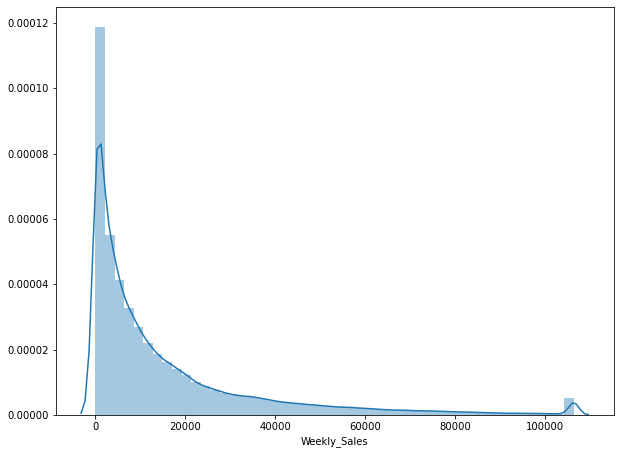

In [50]:
## Y should be normal.
new_merge1.Weekly_Sales.sum()
sn.distplot(new_merge1.Weekly_Sales)

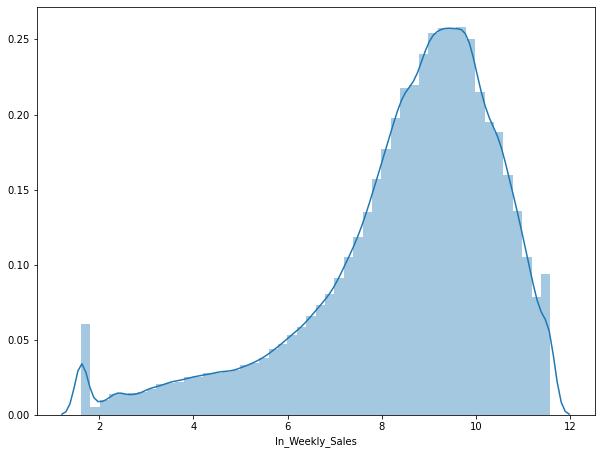

In [51]:
## We can see that Y is not normal.
## We will take the log transformation to make Y normal

new_merge1['ln_Weekly_Sales'] = np.log(new_merge1.Weekly_Sales)
sn.distplot(new_merge1['ln_Weekly_Sales'])

### 2. Y should not have any missing value.

In [52]:
new_merge1.ln_Weekly_Sales.isna().sum()

0

### 3.There must be a relation between X and Y

In [53]:
corrm=new_merge1.corr()
corrm

,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Type_B,Type_C,Weekly_Sales,IsHoliday,Size,Temperature,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2011,Year_2012,ln_Weekly_Sales
Super_Bowl,1.000000,-0.021512,-0.017580,-0.017560,0.000281,-0.000864,0.002487,0.533665,0.000798,-0.202487,...,-0.046302,-0.048175,-0.046323,-0.046436,-0.046452,-0.035762,-0.040493,-0.010285,0.011217,0.003501
Labor_Day,-0.021512,1.000000,-0.017545,-0.017526,-0.000425,-0.000239,-0.000618,0.532622,0.000396,0.112436,...,-0.046211,-0.048081,-0.046233,0.463265,-0.046361,-0.035692,-0.040414,-0.009191,0.010347,-0.003697
Thanksgiving,-0.017580,-0.017545,1.000000,-0.014322,0.000411,-0.000675,0.021788,0.435254,-0.000078,-0.077645,...,-0.037763,-0.039292,-0.037781,-0.037873,-0.037886,0.491570,-0.033026,0.035578,-0.078817,0.014730
Christmas,-0.017560,-0.017526,-0.014322,1.000000,0.000124,-0.000187,-0.006908,0.434772,-0.000090,-0.151807,...,-0.037722,-0.039248,-0.037739,-0.037831,-0.037844,-0.029135,0.433665,0.035061,-0.078730,-0.004256
Type_B,0.000281,-0.000425,0.000411,0.000124,1.000000,-0.266848,-0.134941,0.000167,-0.455646,-0.108191,...,-0.000143,-0.000543,-0.001270,-0.000420,0.000801,0.000472,0.000666,-0.000473,-0.000387,-0.050365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Month_11,-0.035762,-0.035692,0.491570,-0.029135,0.000472,-0.001401,0.010540,0.173348,0.000171,-0.142638,...,-0.076822,-0.079931,-0.076858,-0.077046,-0.077071,1.000000,-0.067184,0.070876,-0.160338,0.010926
Month_12,-0.040493,-0.040414,-0.033026,0.433665,0.000666,-0.000654,0.038712,0.139288,-0.000716,-0.307305,...,-0.086983,-0.090504,-0.087024,-0.087237,-0.087265,-0.067184,1.000000,0.080765,-0.181546,0.027927
Year_2011,-0.010285,-0.009191,0.035578,0.035061,-0.000473,0.000140,-0.001491,0.021653,-0.000550,-0.075123,...,-0.037107,-0.004924,-0.036572,0.013811,-0.036750,0.070876,0.080765,1.000000,-0.497971,-0.003151
Year_2012,0.011217,0.010347,-0.078817,-0.078730,-0.000387,0.004476,-0.007326,-0.060574,-0.004028,0.096986,...,0.058061,-0.010287,0.058729,0.004749,0.005000,-0.160338,-0.181546,-0.497971,1.000000,-0.013200


In [54]:
corrm_new = corrm[(corrm.ln_Weekly_Sales < 0.05) & (corrm.ln_Weekly_Sales > -0.05)].T.columns
corrm_new 

Index(['Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown2', 'MarkDown3', 'CPI',
       ...
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Year_2011', 'Year_2012'],
      dtype='object', length=120)

In [55]:
new_merge1.shape

(421570, 186)

In [56]:
new_merge1=new_merge1.drop(columns=corrm_new)

In [57]:
new_merge1.shape

(421570, 66)

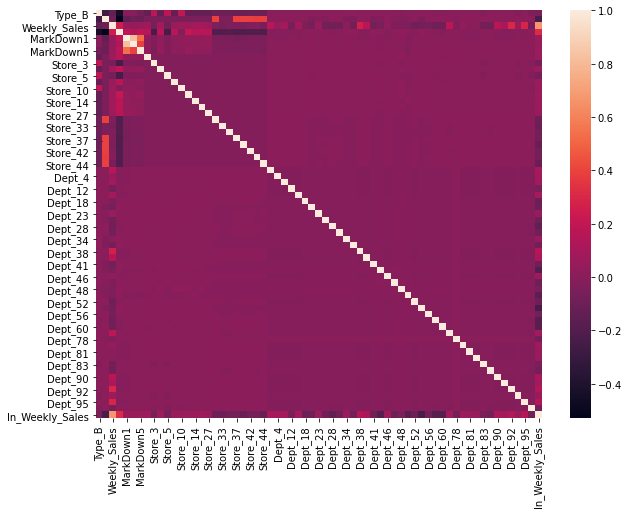

In [58]:
sn.heatmap(new_merge1.corr())

In [59]:
new_merge1.columns

Index(['Date', 'Type_B', 'Type_C', 'Weekly_Sales', 'Size', 'MarkDown1',
       'MarkDown4', 'MarkDown5', 'Store_2', 'Store_3', 'Store_4', 'Store_5',
       'Store_6', 'Store_10', 'Store_13', 'Store_14', 'Store_20', 'Store_27',
       'Store_30', 'Store_33', 'Store_36', 'Store_37', 'Store_38', 'Store_42',
       'Store_43', 'Store_44', 'Dept_2', 'Dept_4', 'Dept_8', 'Dept_12',
       'Dept_13', 'Dept_18', 'Dept_19', 'Dept_23', 'Dept_27', 'Dept_28',
       'Dept_31', 'Dept_34', 'Dept_36', 'Dept_38', 'Dept_40', 'Dept_41',
       'Dept_45', 'Dept_46', 'Dept_47', 'Dept_48', 'Dept_51', 'Dept_52',
       'Dept_54', 'Dept_56', 'Dept_59', 'Dept_60', 'Dept_72', 'Dept_78',
       'Dept_79', 'Dept_81', 'Dept_82', 'Dept_83', 'Dept_85', 'Dept_90',
       'Dept_91', 'Dept_92', 'Dept_93', 'Dept_95', 'Dept_98',
       'ln_Weekly_Sales'],
      dtype='object')

### Building regression model

In [60]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(new_merge1, test_size=0.25, random_state=0)

In [61]:
### Building Linear Regression Model
import statsmodels.formula.api as smf
my_formula="ln_Weekly_Sales~"+ "+" .join(new_merge1.columns.difference(['ln_Weekly_Sales','Date','Weekly_Sales']))

In [62]:
lm=smf.ols(formula=my_formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_Weekly_Sales   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     8342.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:21:45   Log-Likelihood:            -5.2184e+05
No. Observations:              316177   AIC:                         1.044e+06
Df Residuals:                  316114   BIC:                         1.044e+06
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9272      0.023    340.998      0.000       7.882       7.973
Dept_12       -0.8122      0.018    -44.047      0.000      -0.848      -0.776
Dept_13        1.7030      0.018     92.456      0.000       1.667       1.739
Dept_18       -2.0187      0.021    -96.697      0.000      -2.060      -1.978
Dept_19       -2.2886      0.023    -99.290      0.000      -2.334      -2.243
Dept_2         2.0122      0.018    108.857      0.000       1.976       2.048
Dept_23        0.7719      0.019     39.953      0.000       0.734       0.810
Dept_27       -1.7375      0.020    -88.073      0.000      -1.776      -1.699
Dept_28       -2.5150      0.019   -134.028      0.000      -2.552      -2.478
Dept_31       -1.4594      0.019    -76.812      0.000      -1.497      -1.422
Dept_34        0.6329      0.020     31.372      0.000       0.593       0.672
Dept_36       -1.6022      0.020    -78.949      0.000      -1.642      -1.562
Dept_38        2.4484      0.018    132.818      0.000       2.412       2.484
Dept_4         1.5486      0.019     83.608      0.000       1.512       1.585
Dept_40        2.0980      0.018    113.840      0.000       2.062       2.134
Dept_41       -1.8484      0.020    -92.309      0.000      -1.888      -1.809
Dept_45       -6.0452      0.033   -183.433      0.000      -6.110      -5.981
Dept_46        1.1761      0.018     63.643      0.000       1.140       1.212
Dept_47       -5.8190      0.058   -100.009      0.000      -5.933      -5.705
Dept_48       -2.2924      0.036    -64.323      0.000      -2.362      -2.223
Dept_51       -6.1826      0.039   -158.676      0.000      -6.259      -6.106
Dept_52       -1.6562      0.019    -88.648      0.000      -1.693      -1.620
Dept_54       -4.8145      0.021   -226.580      0.000      -4.856      -4.773
Dept_56       -1.4515      0.019    -75.144      0.000      -1.489      -1.414
Dept_59       -2.9438      0.019   -155.825      0.000      -2.981      -2.907
Dept_60       -2.9328      0.019   -151.748      0.000      -2.971      -2.895
Dept_72        1.3949      0.019     73.490      0.000       1.358       1.432
Dept_78       -6.7456      0.094    -71.543      0.000      -6.930      -6.561
Dept_79        1.3063      0.018     71.103      0.000       1.270       1.342
Dept_8         1.6374      0.018     89.124      0.000       1.601       1.673
Dept_81        0.9440      0.018     51.256      0.000       0.908       0.980
Dept_82        0.9864      0.018     53.666      0.000       0.950       1.022
Dept_83       -0.8860      0.019    -46.170      0.000      -0.924      -0.848
Dept_85       -1.3116      0.019    -69.279      0.000      -1.349      -1.275
Dept_90        1.8418      0.018     99.906      0.000       1.806       1.878
Dept_91        1.4255      0.018     77.388      0.000       1.389       1.462
De

In [63]:
# Variation Inflation Factor- to check multicolinearity between variables on baiss of high VIF value
## if the VIF is between 5-10, multicolinearity is likely present and we should consider dropping the variable.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X= dmatrices(my_formula, train, return_type='dataframe')

In [64]:
## for each X.columns , we will calculate the VIF score

dict={'VIF':[variance_inflation_factor(X.values,i) for i in range(X.shape[1])],
       'features': (X.columns)}

In [65]:
vif=pd.DataFrame(dict)
vif.sort_values('VIF', ascending=False)

,VIF,features
63,inf,Type_C
51,inf,Store_30
59,inf,Store_44
58,inf,Store_43
57,inf,Store_42
...,...,...
19,1.009300,Dept_48
16,1.006010,Dept_45
20,1.005405,Dept_51
18,1.001824,Dept_47


In [66]:
#Removing Type_c and Size on basis of high VIF
new_merge1.drop(columns=['Type_C','Size'], axis=1, inplace=True)

In [67]:
new_merge1.shape

(421570, 64)

## Now applying again the regression model

In [68]:
train,test= train_test_split(new_merge1, test_size=0.25, random_state=0)
my_formula="ln_Weekly_Sales~"+ "+" .join(new_merge1.columns.difference(['ln_Weekly_Sales','Date','Weekly_Sales']))

In [69]:
lm2=smf.ols(formula=my_formula, data=train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_Weekly_Sales   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     8390.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:30:09   Log-Likelihood:            -5.2287e+05
No. Observations:              316177   AIC:                         1.046e+06
Df Residuals:                  316115   BIC:                         1.047e+06
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9626      0.005   1841.965      0.000       8.953       8.972
Dept_12       -0.8131      0.018    -43.954      0.000      -0.849      -0.777
Dept_13        1.7017      0.018     92.080      0.000       1.665       1.738
Dept_18       -2.0168      0.021    -96.291      0.000      -2.058      -1.976
Dept_19       -2.2872      0.023    -98.906      0.000      -2.333      -2.242
Dept_2         2.0114      0.019    108.457      0.000       1.975       2.048
Dept_23        0.7713      0.019     39.793      0.000       0.733       0.809
Dept_27       -1.7395      0.020    -87.885      0.000      -1.778      -1.701
Dept_28       -2.5159      0.019   -133.641      0.000      -2.553      -2.479
Dept_31       -1.4615      0.019    -76.671      0.000      -1.499      -1.424
Dept_34        0.6309      0.020     31.170      0.000       0.591       0.671
Dept_36       -1.6035      0.020    -78.754      0.000      -1.643      -1.564
Dept_38        2.4478      0.018    132.355      0.000       2.412       2.484
Dept_4         1.5485      0.019     83.329      0.000       1.512       1.585
Dept_40        2.0970      0.018    113.412      0.000       2.061       2.133
Dept_41       -1.8486      0.020    -92.020      0.000      -1.888      -1.809
Dept_45       -6.0553      0.033   -183.144      0.000      -6.120      -5.990
Dept_46        1.1754      0.019     63.400      0.000       1.139       1.212
Dept_47       -5.8160      0.058    -99.633      0.000      -5.930      -5.702
Dept_48       -2.3472      0.036    -65.683      0.000      -2.417      -2.277
Dept_51       -6.1950      0.039   -158.480      0.000      -6.272      -6.118
Dept_52       -1.6568      0.019    -88.388      0.000      -1.694      -1.620
Dept_54       -4.8136      0.021   -225.801      0.000      -4.855      -4.772
Dept_56       -1.4526      0.019    -74.956      0.000      -1.491      -1.415
Dept_59       -2.9422      0.019   -155.234      0.000      -2.979      -2.905
Dept_60       -2.9348      0.019   -151.356      0.000      -2.973      -2.897
Dept_72        1.3939      0.019     73.194      0.000       1.357       1.431
Dept_78       -6.7210      0.095    -71.050      0.000      -6.906      -6.536
Dept_79        1.3038      0.018     70.735      0.000       1.268       1.340
Dept_8         1.6364      0.018     88.779      0.000       1.600       1.673
Dept_81        0.9429      0.018     51.032      0.000       0.907       0.979
Dept_82        0.9858      0.018     53.461      0.000       0.950       1.022
Dept_83       -0.8848      0.019    -45.957      0.000      -0.923      -0.847
Dept_85       -1.3131      0.019    -69.131      0.000      -1.350      -1.276
Dept_90        1.8403      0.018     99.501      0.000       1.804       1.877
Dept_91        1.4244      0.018     77.072      0.000       1.388       1.461
De

## Now we will predict the values

In [70]:
train['y_predict']=lm2.predict(train)
test['y_predict_test']=lm2.predict(test)

In [71]:
## Now we will find the accuracy of train and test models.
from sklearn import metrics

RMSE_train=np.sqrt(metrics.mean_squared_error(train.ln_Weekly_Sales,train.y_predict))
RMSE_test=np.sqrt(metrics.mean_squared_error(test.ln_Weekly_Sales,test.y_predict_test))

print("RMSE_train : ", RMSE_train )
print("RMSE_test : ", RMSE_test )

RMSE_train :  1.2646568687482136
RMSE_test :  1.263865046454251


In [72]:
MAPE_train = np.mean(abs(train.ln_Weekly_Sales - train.y_predict)*100 / train.ln_Weekly_Sales)
print('MAPE_train:', MAPE_train)

MAPE_test = np.mean(abs(test.ln_Weekly_Sales - test.y_predict_test)*100 / test.ln_Weekly_Sales)
print('\nMAPE_test:', MAPE_test)

MAPE_train: 15.308452404037094

MAPE_test: 15.227953245952309


In [73]:
## Now,again checking the VIF score
y, X= dmatrices(my_formula, train, return_type='dataframe')

# for each X.columns , we will calculate the VIF score

dict={'VIF':[variance_inflation_factor(X.values,i) for i in range(X.shape[1])],
       'features': (X.columns)}

vif=pd.DataFrame(dict)
vif.sort_values('VIF', ascending=False).head(5)

,VIF,features
0,4.679550,Intercept
40,3.790999,MarkDown1
41,3.185119,MarkDown4
61,1.518299,Type_B
42,1.431669,MarkDown5


In [74]:
new_merge1.shape

(421570, 64)

In [75]:
lm2.resid ## The difference between the observed value of the dependent variable (y) 
                               ## and the predicted value (ŷ) is called the residual.

140387   -5.133378
105652    0.276885
73498    -1.098156
203354    0.752131
329039    1.913388
            ...   
359783    2.200391
358083    0.446773
152315   -0.476711
117952   -0.145691
305711    1.487631
Length: 316177, dtype: float64

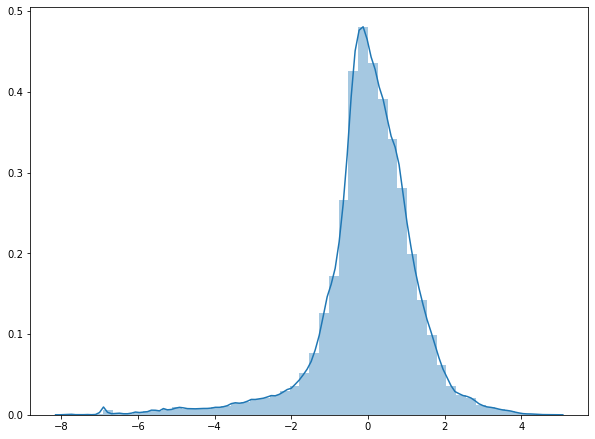

In [76]:
sn.distplot(lm2.resid) ## polotting residuals

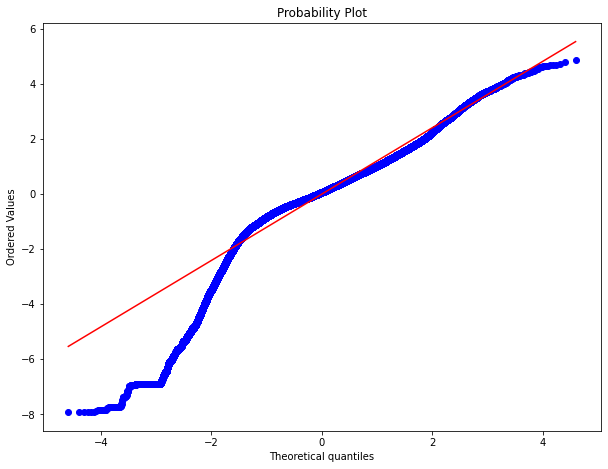

In [77]:
# assumption: Normality of the residuals/error (using Q-Q plot)
from scipy import stats
import pylab

stats.probplot(lm2.resid, dist = 'norm', plot = pylab)
pylab.show()

# If errors are normally and randomly distributed, they would be following a straight line pattern
# Q-Q plot shows if the residuals are plotted along the line

## Now testing data set

In [78]:
stores=pd.read_csv("C:\\Users\\tavleen kaur\\Desktop\\0b. Assignments & Case Studies\\New folder (2)\\Walmart Store Sales Forecasting\\stores.csv")

t=pd.read_csv("C:\\Users\\tavleen kaur\\Desktop\\0b. Assignments & Case Studies\\New folder (2)\\Walmart Store Sales Forecasting\\test.csv")

features=pd.read_csv("C:\\Users\\tavleen kaur\\Desktop\\0b. Assignments & Case Studies\\New folder (2)\\Walmart Store Sales Forecasting\\features.csv")

In [79]:
# Now, merge the data sets
tt=pd.merge(t,stores)
merge2=pd.merge(tt,features)

In [80]:
merge2.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [81]:
merge2.shape

(115064, 15)

In [82]:
merge2.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [83]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  object 
 5   Size          115064 non-null  int64  
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     114915 non-null  float64
 9   MarkDown2     86437 non-null   float64
 10  MarkDown3     105235 non-null  float64
 11  MarkDown4     102176 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           76902 non-null   float64
 14  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


## DATA TYPE CONVERSIONS

In [84]:
merge2['Date']=pd.to_datetime(merge2['Date'])
(merge2['Date']).dtype

dtype('<M8[ns]')

In [85]:
merge2['IsHoliday']=np.where(merge2['IsHoliday']==True,1,merge2['IsHoliday'])
merge2['IsHoliday']=np.where(merge2['IsHoliday']==True,0,merge2['IsHoliday'])

In [86]:
merge2.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                int32
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

# now splitting the variables

In [87]:
continous=merge2.loc[:, ((merge2.dtypes=='int64')|(merge2.dtypes=='int32')| (merge2.dtypes=='float64'))]
categorical=merge2.loc[:,(merge2.dtypes=='object')]
date2=merge2.loc[:, (merge2.dtypes=='datetime64[ns]')]

In [88]:
continous.shape

(115064, 13)

In [89]:
categorical.shape

(115064, 1)

In [90]:
date2.shape

(115064, 1)

In [91]:
## creating a UDF to get detailed summary of the continous data
def continous_var_summary(x):
    return pd.Series([x.count(),x.isna().sum(),x.mean(),x.median(),x.quantile(0.01),x.quantile(0.05),x.quantile(0.1),
                      x.quantile(0.5),x.quantile(0.75),x.quantile(0.90),x.quantile(0.95),x.quantile(0.99)],
                     
                      index=['COUNT','N','MEAN','MEDIAN','P1','P5','P10','P50','P75','P90','P95','P99'])

continous.apply(continous_var_summary).T.round(2)

,COUNT,N,MEAN,MEDIAN,P1,P5,P10,P50,P75,P90,P95,P99
Store,115064.0,0.0,22.24,22.00,1.00,3.00,5.00,22.00,33.00,40.00,43.00,45.00
Dept,115064.0,0.0,44.34,37.00,1.00,4.00,7.00,37.00,74.00,92.00,95.00,98.00
IsHoliday,115064.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Size,115064.0,0.0,136497.69,140167.00,34875.00,39690.00,39910.00,140167.00,202505.00,204184.00,206302.00,219622.00
Temperature,115064.0,0.0,53.94,54.47,11.44,23.98,29.97,54.47,67.35,79.48,83.82,92.14
Fuel_Price,115064.0,0.0,3.58,3.61,2.96,3.16,3.23,3.61,3.77,3.87,3.95,4.08
MarkDown1,114915.0,149.0,7689.22,4842.29,20.84,189.49,457.66,4842.29,9439.14,15325.04,23140.88,65757.57
MarkDown2,86437.0,28627.0,3734.05,742.59,0.02,6.14,25.77,742.59,2735.67,9277.29,22671.67,42920.21
MarkDown3,105235.0,9829.0,2403.09,78.26,0.15,1.18,3.10,78.26,272.58,698.93,2361.57,86476.66
MarkDown4,102176.0,12888.0,3356.22,840.94,2.61,16.96,37.36,840.94,3096.92,7674.41,14191.01,44739.28


## Outlier Treatment

In [92]:
continous=continous.apply(lambda x:x.clip(lower=x.dropna().quantile(0.01), upper=x.quantile(0.99)))

## Missing values treatment

In [93]:
merge2=merge2.apply(lambda x: x.fillna(0))
merge2.isna().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [94]:
continous=continous.apply(lambda x: x.fillna(0))
continous.isna().sum()

Store           0
Dept            0
IsHoliday       0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [95]:
categorical.isna().sum()

Type    0
dtype: int64

In [96]:
date2.isna().sum()

Date    0
dtype: int64

## Feature extraction

In [97]:
date2['Day']=  pd.DatetimeIndex(date2['Date']).day
date2['Month']= pd.DatetimeIndex(date2['Date']).month
date2['Year']= pd.DatetimeIndex(date2['Date']).year

In [98]:
# Making New Holiday Variable Based on Given Data.

w = np.where
n = date2['Date']

date2['Super_Bowl'] = w((n == datetime(2010, 2, 12)) | (n == datetime(2011, 2, 11)) | (n == datetime(2012, 2, 10)) | (n == datetime(2013, 2, 8)), 1, 0)
date2['Labour_Day'] = w((n == datetime(2010, 9, 10)) | (n == datetime(2011, 9, 9)) | (n == datetime(2012, 9, 7)) | (n == datetime(2013, 9, 6)), 1, 0)
date2['Thanksgiving'] = w((n == datetime(2010, 11, 26)) | (n == datetime(2011, 11, 25)) | (n == datetime(2012, 11, 23)) | (n == datetime(2013, 11, 29)), 1, 0)
date2['Christmas'] = w((n == datetime(2010, 12, 31)) | (n == datetime(2011, 12, 30)) | (n == datetime(2012, 12, 28)) | (n == datetime(2013, 12, 27)), 1, 0)

## Dummy Variables

In [99]:
s_1=continous[['Store','Dept']]
s_2=date2[['Day','Month','Year']]

In [100]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname, drop_first=True)
    df=pd.concat([df,col_dummies], axis=1)
    df.drop(colname, axis=1, inplace=True)
    return df

In [101]:
for c_feature in s_1:
    s_1[c_feature]=s_1[c_feature].astype('category')
    s_1=create_dummies(s_1,c_feature)

In [102]:
s_1.shape

(115064, 123)

In [103]:
s_1.columns

Index(['Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7',
       'Store_8', 'Store_9', 'Store_10', 'Store_11',
       ...
       'Dept_87', 'Dept_90', 'Dept_91', 'Dept_92', 'Dept_93', 'Dept_94',
       'Dept_95', 'Dept_96', 'Dept_97', 'Dept_98'],
      dtype='object', length=123)

In [104]:
for c_feature in s_2:
    s_2[c_feature]=s_2[c_feature].astype('category')
    s_2=create_dummies(s_2,c_feature)

In [105]:
s_2.shape

(115064, 35)

In [106]:
s_2.columns

Index(['Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_7', 'Day_8', 'Day_9', 'Day_10',
       'Day_11', 'Day_12', 'Day_14', 'Day_15', 'Day_16', 'Day_17', 'Day_18',
       'Day_19', 'Day_21', 'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26',
       'Day_28', 'Day_29', 'Day_30', 'Day_31', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_11', 'Month_12', 'Year_2013'],
      dtype='object')

In [107]:
for c_feature in categorical:
    categorical[c_feature]=categorical[c_feature].astype('category')
    categorical=create_dummies(categorical,c_feature)

In [108]:
categorical.shape

(115064, 2)

In [109]:
categorical.columns

Index(['Type_B', 'Type_C'], dtype='object')

In [110]:
continous.drop(['Store','Dept'], axis=1, inplace=True)

In [111]:
date2.drop(['Day','Month','Year'], axis=1, inplace=True)

In [112]:
date2.shape

(115064, 5)

In [113]:
categorical.shape

(115064, 2)

In [114]:
continous.shape

(115064, 11)

In [115]:
s_1.shape

(115064, 123)

In [116]:
s_2.shape

(115064, 35)

## Now concatenate all the dataframe including dummy variables

In [117]:
categorical.isna().sum()

Type_B    0
Type_C    0
dtype: int64

In [121]:
continous.isna().sum().sum()

0

In [120]:
s_1.isna().sum().sum()

0

In [123]:
date2.isna().sum().sum()

0

In [124]:
new_merge2=pd.concat([categorical,continous,s_1,date2,s_2], axis=1)
new_merge2.shape

(115064, 176)

In [125]:
new_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Columns: 176 entries, Type_B to Year_2013
dtypes: datetime64[ns](1), float64(9), int32(5), int64(1), uint8(160)
memory usage: 30.3 MB


## Predicting the weekly sales on testing data

In [133]:
new_merge2['Weekly_Sales']=np.exp(lm2.predict(new_merge2))
new_merge2.Weekly_Sales.head()

0     7790.277349
1    58223.147549
2     7790.277349
3    36648.459130
4     7790.277349
Name: Weekly_Sales, dtype: float64

# Consolidate data at Store, Department and Week level

In [141]:
new_merge2['Store']=t['Store']
new_merge2['Dept']=t['Dept']

In [143]:
new_merge2.shape

(115064, 179)

In [148]:
final=pd.concat([new_merge2.Store,new_merge2.Dept,new_merge2.Weekly_Sales], axis=1)
final.shape

(115064, 3)

In [149]:
final.isna().sum().sum()

0

In [162]:
ID=final.Store.astype(str) + '_' + final.Dept.astype(str)
ID.head()

0    1_1
1    1_1
2    1_1
3    1_1
4    1_1
dtype: object

In [164]:
predicted_Sales=pd.concat([ID,final.Weekly_Sales], axis=1)
predicted_Sales.columns=['ID','Weekly_Sales']
predicted_Sales.head()

,ID,Weekly_Sales
0,1_1,7790.277349
1,1_1,58223.147549
2,1_1,7790.277349
3,1_1,36648.459130
4,1_1,7790.277349


## We have predicted the sales